**THE CHALLENGE**

Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label    Description

0        T-shirt/top

1        Trouser

2        Pullover

3        Dress

4        Coat

5        Sandal

6        Shirt

7        Sneaker

8        Bag

9        Ankle boot

In [12]:
#import the necessary libraries

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models,layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
#load the data and normalize it to values btw 0 and 1
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
#find the sape of the data
for _ in train_images,train_labels,test_images,test_labels:
  print(_.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


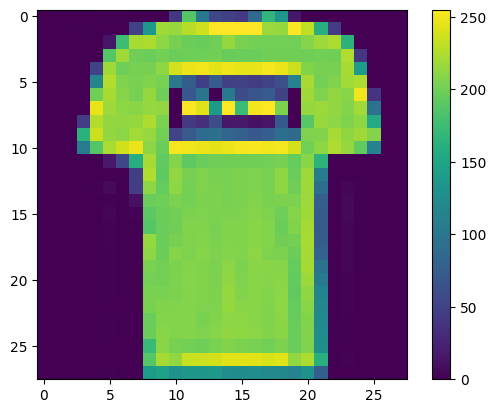

In [8]:
#lets display one image
plt.imshow(train_images[1])
plt.grid(False)
plt.colorbar()

In [9]:
#preprocess the data
train_images = train_images/255
test_images = test_images/255

#onehoteencode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
model = Sequential([
    Flatten(input_shape=(28,28)),   #input layer
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')            #output layer

])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.15,batch_size=32)

Epoch 1/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7589 - loss: 0.6690 - val_accuracy: 0.8486 - val_loss: 0.4039
Epoch 2/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8620 - loss: 0.3785 - val_accuracy: 0.8634 - val_loss: 0.3857
Epoch 3/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8729 - loss: 0.3432 - val_accuracy: 0.8674 - val_loss: 0.3802
Epoch 4/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8830 - loss: 0.3201 - val_accuracy: 0.8699 - val_loss: 0.3611
Epoch 5/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8887 - loss: 0.3006 - val_accuracy: 0.8810 - val_loss: 0.3403
Epoch 6/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8944 - loss: 0.2799 - val_accuracy: 0.8784 - val_loss: 0.3489
Epoch 7/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8984 - loss: 0.2693 - val_accuracy: 0.8851 - val_loss: 0.3231
Epoch 8/10
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9060 - loss: 0.253

In [21]:
#get the accuracy and classification report of the model
from sklearn.metrics import classification_report
#get the accuracy and classification report of the model
from sklearn.metrics import classification_report
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(test_labels,to_categorical(y_pred)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1000
           1       1.00      0.97      0.98      1000
           2       0.77      0.83      0.80      1000
           3       0.82      0.94      0.88      1000
           4       0.86      0.70      0.77      1000
           5       0.97      0.96      0.97      1000
           6       0.66      0.74      0.70      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.92      0.95      1000
           9       0.98      0.93      0.95      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000
 samples avg       0.88      0.88      0.88     10000

